In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
trajectory_results = pd.read_csv('Eco_Traj.txt', delimiter='\t')
filter_trajctory_by_time = trajectory_results[trajectory_results['simulation_time'].between(4120, 4450)]
vehicle_id = filter_trajctory_by_time.vehicle_id.unique()
control_vehicle_id = 5380
non_control_vehicle_id = 154
section_dict = {'1249': [1252, 5325], '1272': [1270, 1784]}
filter_trajctory_by_time.head()


,simulation_time,section_id,veh_type_id,numberLane,vehicle_id,distance2End,CurrentSpeed
112853,4120.0,1249,5380,1,2242,2.88935,0.0000
112854,4120.0,1249,154,1,2248,8.48953,0.0000
112855,4120.0,1249,5380,1,2254,13.56280,0.0000
112856,4120.0,1249,5380,1,2267,169.42200,59.3413
112857,4120.0,1249,5380,1,2275,228.20300,55.8374


In [71]:
for col_section, downstream_section in section_dict.items():
        col_section = int(col_section)
        filter_trajctory_by_time.loc[filter_trajctory_by_time['section_id']==col_section, 'distance2End'] *= -1

d:\Aimsun\Aimsun_scripting\Model\.venv\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,simulation_time,section_id,veh_type_id,numberLane,vehicle_id,distance2End,CurrentSpeed
112853,4120.0,1249,5380,1,2242,-2.88935,0.0
112877,4120.8,1249,5380,1,2242,-2.88935,0.0
112901,4121.6,1249,5380,1,2242,-2.88935,0.0
112925,4122.4,1249,5380,1,2242,-2.88935,0.0
112950,4123.2,1249,5380,1,2242,-2.88935,0.0


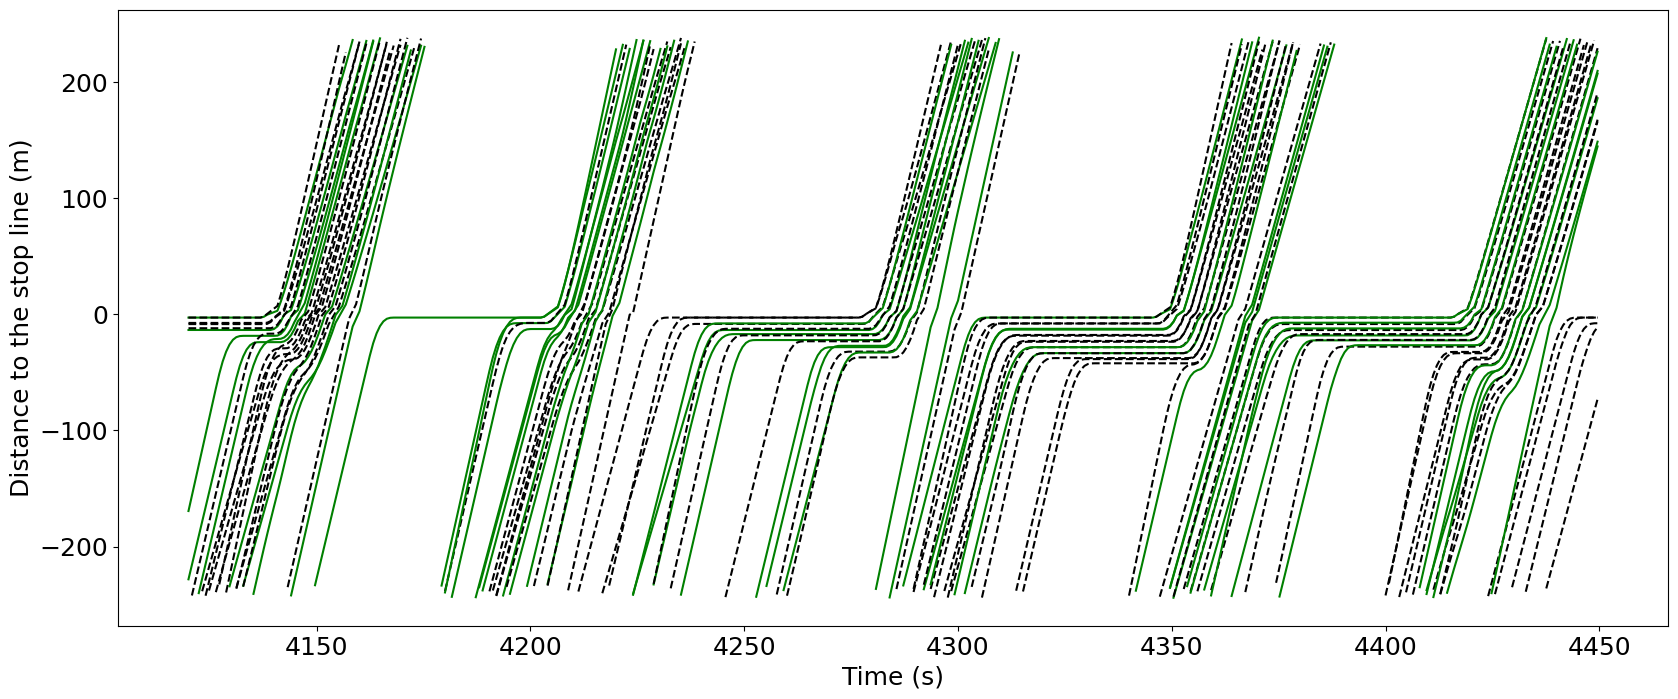

In [72]:
plot_sec_id = [1249, 1252]
numlane = [1, 2, 3]
reduced_trajectory = filter_trajctory_by_time[filter_trajctory_by_time.section_id.isin(plot_sec_id)]
error_check = pd.DataFrame(columns=['simulation_time', 'section_id', 'veh_type_id', 'numberLane', 'vehicle_id', 'distance2End', 'CurrentSpeed'])

plt.figure(figsize=(20,8))

for veh_id in vehicle_id:
    veh_id_df = reduced_trajectory[reduced_trajectory.vehicle_id == veh_id].sort_values('simulation_time')

    if veh_id_df['section_id'] not in np.array(plot_sec_id[0]): # do not plot trajectories for those which do not travel from the control section
        continue
    
    if control_vehicle_id in veh_id_df['veh_type_id'].unique():
        color = 'g'
    else:
        color = 'k--'
    
    veh_id_df = veh_id_df[veh_id_df['numberLane'].isin(numlane)]
    error_check = error_check.append(veh_id_df)
    time = veh_id_df['simulation_time']
    plt.plot(time, veh_id_df['distance2End'], color)
    plt.xlabel('Time (s)', fontdict={'size':18, 'color':'black'})
    plt.ylabel('Distance to the stop line (m)', fontdict={'size': 18})
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

error_check.head()

In [67]:
error_check.to_csv('error_check.csv')

In [47]:
error_check.vehicle_id.unique()

array([2199, 2180, 2202, 2203, 2207, 2216, 2228, 2221, 2206, 2231, 2233,
       2238, 2242, 2241, 2245, 2247, 2234, 2246, 2272, 2252, 2249, 2254,
       2261, 2263, 2271, 2283, 2268, 2273, 2284, 2288, 2293, 2299, 2297,
       2278, 2311, 2306, 2318, 2314, 2330, 2316, 2342, 2345, 2350, 2349,
       2357, 2356, 2364, 2362, 2366, 2380, 2375, 2370, 2381, 2376, 2392,
       2383, 2384, 2395, 2391, 2390, 2401, 2403, 2414, 2416, 2412, 2417,
       2423, 2427, 2422, 2425, 2447, 2431, 2446, 2444, 2457, 2451, 2453,
       2466, 2462, 2465], dtype=object)